In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def gauss(x,mu,s):
    return np.exp(-(x-mu)**2/(2*s**2))

In [3]:
def gauss_func(w,x):
    m = len(w) -1   # 차원의 갯수 
    mu = np.linspace(5,30,m)
    s = mu[1] - mu[0]
    y = np.zeros_like(x)
    for j in range(m):
        y = y+ w[j]* gauss(x,mu[j],s)
    y = y+ w[m]
    return y    

In [4]:
def mse_gauss_func(x,t,w):
    y = gauss_func(w,x)
    mse = np.mean((y-t)**2)
    return mse

In [5]:
def fit_gauss_func(x,t,m):
    mu = np.linspace(5,30,m)
    s = mu[1] - mu[0]
    n = x.shape[0]
    psi = np.ones((n,m+1))
    for j in range(m):
        psi[:,j] = gauss(x,mu[j],s)
    psi_T = np.transpose(psi)
    
    b = np.linalg.inv(psi_T.dot(psi))
    c = b.dot(psi_T)
    w = c.dot(t)
    return w

In [6]:
def show_gauss_func(w):
    xb = np.linspace(X_min,X_max,100)
    y = gauss_func(w,xb)
    plt.plot(xb,y,'r-',linewidth=3)
    plt.xlabel('Age, X')
    plt.ylabel('Height, T')

In [7]:
np.random.seed(seed=1)
X_min = 4
X_max = 30
X_n = 16
X = 5 + 25*np.random.rand(X_n)
prm_c=[170, 108, 0.2]
T = prm_c[0] - prm_c[1]*np.exp(-prm_c[2]*X) + 4*np.random.randn(X_n)
np.savez('ch5_data.npz',X=X,X_min=X_min,X_max=X_max,X_n=X_n,T=T)


M[0]=2
W[0]=[105.6 164.4 -70. ]
SD[0]=4.68 cm

M[1]=4
W[1]=[29.4 75.7  2.9 98.3 54.9]
SD[1]=3.98 cm

M[2]=7
W[2]=[  6.3  32.3  22.6  13.   68.9 -45.9 107.2 101.7]
SD[2]=3.40 cm

M[3]=9
W[3]=[ 135.8  -15.6  172.2  -50.5  231.6 -132.4  382.1 -411.2  627.9  -19. ]
SD[3]=2.99 cm



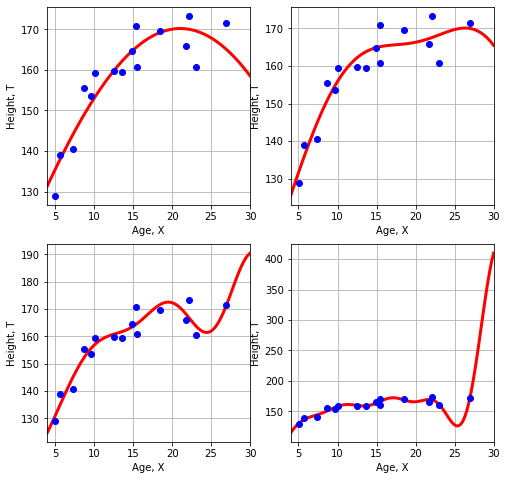

In [56]:
plt.figure(figsize=(8,8))
M = [2,4,7,9]
NOG = 4
W_arr= [[],[],[],[]]

for w in range(4) :
    W_arr[w] = fit_gauss_func(X,T,M[w])
    plt.subplot(2,2,w+1)
    show_gauss_func(W_arr[w])
    plt.plot(X,T,'bo')
    plt.xlim(X_min,X_max)
    plt.grid(True)
    mse = mse_gauss_func(X,T,W_arr[w])
    print('M[{0:d}]={1:d}'.format(w,M[w]))
    print('W[{0:d}]='.format(w)+str(np.round(W_arr[w],1)))
    print("SD[{0:d}]={1:.2f} cm\n".format(w,np.sqrt(mse)))
plt.show()

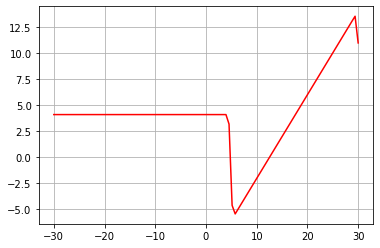

In [65]:
x = np.linspace(-30,30,100)
m = x*np.exp(-2)
y = gauss_func(m,x)
plt.plot(x,y,'r-')
plt.grid(True)

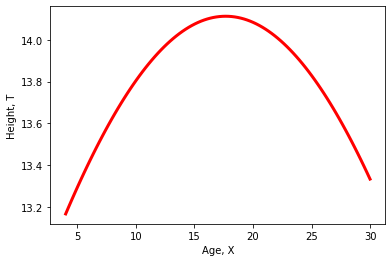

In [99]:
show_gauss_func([5,5.1,5.2])